# \[Week3] 텍스트분석 기초

## 1. 텍스트 분석 기본 용어 정리
https://wikidocs.net/21694  
위의 링크와 구글링으로 정리  
용어 정리는 추후에 본인이 보기에 편한 형식으로 정리하면 됩니다.

1. 토큰화 (Tokenization)  
\[답변] 자연어 처리에서 크롤링 등으로 얻어낸 코퍼스(corpus)데이터가 필요에 맞게 전처리되지 않은 상태라면, 해당 데이터를 사용하고자 하는 용도에 맞게 토큰화(tokenization)를 해야 한다. 주어진 코퍼스에서 토큰이라 불리는 단위로 나누는 작업을 토큰화라고 부른다. 토큰의 단위는 상황에 따라 다르지만 보통 **의미있는 단위**로 토큰을 정의한다.<br><br>
    1. 단어 토큰화  
    Time is an illusion - "Time" "is" "an" "illusion"<br><br>
    2. 토큰화 중 생기는 선택  
        + **from nltk.tokenize import word_tokenize**  
        Don't = Do + n't  
        Jone's = Jone + 's  
        + **form nltk.tokenize import WordPunctTokenizer**  
        Don't = Don + ' + t  
        Jone's = Jone + ' + s<br><br>
    3. 토큰화에서 고려해야 할 사항
        + 구두점이나 특수 문자를  단순 제외해서는 안 된다
        예) 온점(.) : 문장의 경계를 알 수 있음  
        + 줄임말과 단어 내에 띄어쓰기가 있는 경우  
        *we're = we + are*에서 *re*을 접어(clitic)라고 함. *New York*의 경우에는 단어이지만 중간에 띄어쓰기가 존재함<br><br>
    4. 표준 토큰화 예제  
        + 규칙1. 하이픈으로 구성된 단어는 하나로 유지한다  
        + 규칙2. *doesn't*와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.<br><br>
    5. 문장 토큰화 (=sentence sgmentation, 문장분류)   
    보통 갖고 있는 코퍼스가 정제되지 않은 상태라면, 코퍼스는 문장 단위로 구분되어 있지 않을 간으성이 높음. 이를 위해 문장 토큰화가 필요함. 직관적으로 문장부호(?, ., !)기준으로 문장을 잘라내면 되지 않을까라고 생각할 수 있지만 *꼭 그런 것은 아님.* 물음표와 느낌표는 명확한 구분자의 역할을 하지만 **온점은 문장의 끝이 아니더라도 등장할 수 있**기 때문.  
    예) IP 192.188.56.31 서버에 들어가줘. 그리고 점심 먹으러 가자.  
    예) Since I'm looking for Ph.D. students. I get the same question.  <br><br>
    **from nltk.tokenize import sent_tokenize**  
    text = "I am looking for Ph.D. students. and you are a ~"  
    결과 : 'I am looking for Ph.D. students.','and you are a ~'  
    NLTK는 단순히 온점을 구분자로 하여 문장을 구분하지 않음<br><br>
    한국어에 대한 문장 토큰화 도구 : KSS<br><br>
   
    6. 이진 분류기  
    문장 토큰화에서의 예외 사항을 발생시키는 온점의 처리를 위해 두 개의 클래스로 분류하는 이진 분류기를 사용하기도 함  
        + 온점이 약어(abbreivation)로 쓰이는 경우  
        영어권 언어의 경우는 약어 사전을 참고, 오픈소스 NLTK, OpenNLP 등이 있음  
        + 온점이 정말로 구분자의 역할을 할 경우<br><br>
    7. 한국어에서의 토큰화의 어려움  
    한국어의 경우 띄어쓰기 단위를 '어절'이라고 하는데, 어절 토큰화와 단어 토큰화가 같지 않기 때문에 어절 토큰화는 한국어 NLP에서 지양되고 있음. 
        + 한국어는 교착어이다.  
        he/him = 그가, 그에게, 그를, 그와, ... >> 다양한 조사  
        어절이 독립된 단어가 아니라 조사 등의 무언가가 붙어 이를 전부 분리해야 함  
        <br><br>
        **자립 형태소** : 그 자체로 단어가 됨 >> 체언, 수식언, 감탄사  
        **의존 형태소** : 접사, 어미, 조사, 어간 <br><br>
        "에디가 딥러닝 책을 읽었다"  
        자립형태소 : 에디, 딥러닝, 책  
        의존형태소 : -가, -을, 읽-, -었, -다  
        <br><br>
        한국어에서 영어에서의 단어토큰화와 유사한 형태를 얻으려면 *형태소 토큰화*를 해야 함
        + 한국어는 띄어쓰기가 영어보다 지켜지지 않는다
    8. 품사 태깅  
    단어는 같지만 품사에 따라 단어의 의미가 달라지기도 함  
    fly : v-날다, n-파리  
    못 : adf-할 수 없다, n-못  
    단어의 의미를 제대로 파악하기 위해 어떤 품사로 쓰였는지 보는 것이 주요 지표가 됨
        

2. 불용어 (Stopword)  
\[답변] 갖고 있는 데이터에서 유의미한 단어 토큰만 선별하기 위해서는 **큰 의미가 없는 단어 토큰을 제거**하는 작업이 필요하다. 큰 의미가 없다는 것은 문장 분석에 있어서는 *큰 도움이 되지 않는 단어*들을 말한다. 조사, 접미사 등의 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는 덴는 거의 기여하는 바가 없다. 이러한 단어들을 **불용어**라고 한다.<br><br>
    1. NLTK를 통해서 불용어 제거하기  
    text = "Family is not an important thing. It's everything."  
    결과 : Family, important, thing, ., It, 's, everything, .  
    NLTK가 정의하고 있는 불용어를 제외한 결과이다. is, not, an과 같은 단어들이 제거되었다.<br><br>
    2. 한국어에서 불용어 제거하기  
    간단하게는 토큰화 후에 조사, 접속사 등을 제거하는 방법이 있다.  
    하지만 명사와 형용사 같은 단어들 중에서도 불용어로 제거하고 싶은 단어들이 생기기도 함. 결국에는 사용자가 **직접 불용어 사전을 만들**게 되는 경우가 많다.<br>  
    text = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든."  
    stop_word = "아무렇게나 아니거든 아무거나 어찌하든 같다 비슷하다"  
    결과 : 고기를, 구우려고, 안, 돼, ., 고기라고, 다, 같은, 게, .<br><br>
    한국어 불용어를 제거하는 더 좋은 방법은 코드 내에서 직접 정의하지 않고 **txt나 csv파일로 수 많은 불용어를 정리하고 이를 불러와서 사용하는 방법**이다.

3. 정규표현식 (Regular Expression) 문법  

1) 정규 표현식에 해당하는 스트링 2개 이상  
(1) a+  
\[답변] aa, aaaaaa
<br>
(2) a{3}b{2,}  
\[답변] aabb, aaabbbbbbbb
<br>
(3) .+b$  
\[답변] aab, cccb
<br>
(4) ^ab*  
\[답변] aab, aabbbbbbb
<br>
(5) \[a-z]+\[^a|z]  
\[답변] aaaaab, rrrre

2) 정규 표현식 문자 규칙 의미  
(1) \\\ \[답변] 역 슬래쉬 문자 자체를 의미
<br>
(2) \d \[답변] 모든 숫자를 의미. \[0-9]와 의미가 동일함
<br>
(3) \D \[답변] 숫자를 제외한 모든 문자를 의미. \[^0-9]와 의미가 동일함
<br>
(4) \s \[답변] 공백을 의미. \[\t\n\r\f\v]와 의미가 동일함
<br>
(5) \S \[답변] 공백을 제외한 문자를 의미. \[^\t\n\r\f\v]와 의미가 동일함
<br>
(6) \w \[답변] 문자 또는 숫자를 의미. \[a-zA-Z0-9]와 의미가 동일함
<br>
(7) \W \[답변] 문자 또는 숫자가 아닌 문자를 의미. \[^a-zA-Z0-9]와 의미가 동일함

3) 정규표현식 모듈 함수 사용

(1) 출력 결과 : \['010', '1234', '1234', '30']

In [1]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여""" 

re.findall("\d+", text)

(2) 출력 결과 : \['1234', '5678']

In [2]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여"""  

re.findall("\d{4}", text)

(3) 출력 결과 : \['John', 'James', 'Noonsong'] 

In [3]:
import re
text = """100 John    PROF
101 James   STUD
102 Noonsong   STUD""" 

re.findall("[A-Z][a-z]+", text)

4. 정수 인코딩(Integer Encoding)  

1) 문장 분리 및 토큰화

In [4]:
# 이 셀은 실행만 시키면 됩니다.
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."
# 문장 분리
sentences = text.replace("!", ".").split(". ")
# 토큰화
tokenized = [sentence.lower().split() for sentence in sentences]

2) 각 단어에 대한 빈도수 딕셔너리 저장  
\[출력] \[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]

In [5]:
# 각 단어에 대한 빈도수 딕셔너리로 저장 
# *stopword는 제거
from nltk.corpus import stopwords
vocab = {}
stop_words = set(stopwords.words('english'))
sentences = []      # stopword 제거된 토큰화된 문장 리스트 저장
# 여기부터 코드 작성
for i in tokenized:
    result = []
    for word in i:
        if word not in stop_words:
            result.append(word)
            if word not in vocab:
                vocab[word] = 0
            vocab[word] += 1
    sentences.append(result)


# 빈도수 높은 순으로 정렬
# 여기부터 코드 작성
vocab_sorted = sorted(vocab.items(), key=lambda x:x[1], reverse=True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]


3) 빈도순으로 정렬된 단어에 정수 인덱스 부여  
\[출력] \[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]

In [6]:
word_to_index = {}
i = 1
# 여기부터 코드 작성
for (word, freq) in vocab_sorted:
    word_to_index[word] = i
    i += 1
# dictionary에 없는 단어
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain.': 13, 'OOV': 14}


4) word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩  
\[출력] \[\[1, 5], \[1, 8, 5], \[1, 3, 5], \[9, 2], \[2, 4, 3, 2], \[3, 2], \[1, 4, 6], \[1, 4, 6], \[1, 4, 2], \[7, 7, 3, 2, 10, 1, 11], \[1, 12, 3, 13]]

In [7]:
encoded = []
# 여기부터 코드 작성
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


5. 패딩(Padding)  
0으로 패딩해보기

1) 가장 긴 문장 길이 찾기

In [8]:
max_len = max(len(item) for item in encoded) # 가장 긴 문장 길이 찾기
print(max_len)

7


2) 가장 긴 문장 길이에 맞춰 0으로 채워넣기  
\[\[ 1  5  0  0  0  0  0]  
 \[ 1  8  5  0  0  0  0]  
 \[ 1  3  5  0  0  0  0]  
 \[ 9  2  0  0  0  0  0]  
 \[ 2  4  3  2  0  0  0]  
 \[ 3  2  0  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  2  0  0  0  0]  
 \[ 7  7  3  2 10  1 11]  
 \[ 1 12  3 13  0  0  0]]

In [9]:
import numpy as np
for sentence in encoded:
    # 아래 pass 지우고 코드 작성
    while len(sentence) < max_len:
        sentence.append(0)

encoded = np.array(encoded)        # 지금은 보기 좋게 하기 위함임..
print(encoded)

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]


6. 원-핫 인코딩(One-Hot Encoding)  
\[출력] \[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
def one_hot_encoding(word, word_to_index):
    # 아래 pass 지우고 여기부터 코드 작성
    one_hot_vector = [0]*(len(word_to_index))
    index = word_to_index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

In [11]:
# 위의 함수와 정수 인코딩 실행 후 실행할 것.
one_hot_encoding("huge", word_to_index)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

7. Bag of Words(BoW)  
\[답변] 단어의 등장 순서를 고려하지 않고 단어들의 출현 빈도에만 집중하는 텍스트 수치화 표현 방법<br><br>
  **Bag of Word** 
  = 단어들의 가방텍스트 문서에 있는 단어들을 가방에다 전부 넣은 후 가방을 흔든다.  
      + 각 단어에 고유한 정수 인덱스를 부여
      + 각 인덱스의 위치에 단어 토큰의 등장 회수를 기록한 벡터를 만듦

## 2. 텍스트 분석 전처리 경험해보기

1. 본인이 좋아하는 노래 가사, 시 등 text에 저장

In [12]:
text = "This is your life. You can go anywhere You gotta grab the wheel and own it. And drive it like you stole it."

2. 토큰화

In [13]:
# Tokenizer 사용해보셔도 됩니다.
# Tokenizer 사용 시 시간이 좀 걸리기 때문에 그냥 띄어쓰기 기준으로 나눴습니다,
text = text.split()

3. 불용어 제거

In [14]:
stopwords = ['this','your','the','it'] # 본인이 생각하는 불용어 리스트 만들기

4. 빈도수 리스트 만들기

In [15]:
word_dict = {}
# 코드 작성
sentences=[]
result=[]

for word in text:
    word = word.lower()
    if word not in stopwords:
        result.append(word)
        if word not in word_dict:
            word_dict[word] = 0
        word_dict[word] += 1
sentences.append(result)

word_sorted = sorted(word_dict.items(), key = lambda x:x[1], reverse=True)
print(word_sorted)

[('you', 3), ('and', 2), ('it.', 2), ('is', 1), ('life.', 1), ('can', 1), ('go', 1), ('anywhere', 1), ('gotta', 1), ('grab', 1), ('wheel', 1), ('own', 1), ('drive', 1), ('like', 1), ('stole', 1)]


5. 워드 클라우드 이미지 생성

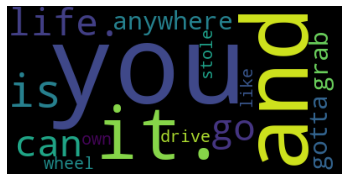

In [16]:
from wordcloud import WordCloud
# word_dict 를 이용해 wordcloud 만들기
# 코드 작성
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()